# importing libraries

In [62]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# importing data & pre-processing Step

### importing & describing data 

In [63]:
data = pd.read_csv("train.csv")

In [64]:
data.head()
# the column Name contains some useful informations (mr, mrs, miss, ...)
#we will extract those informations in feature engineering section

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.describe()
# this project aims to predict survived passengers in sinking titanic: survived={1 if survived, 0 if not}
#mean(survived) = 0.38 -> 38% did survive from this titanic sinking

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
data.info()
# features with NA values: age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### filling na values 

In [67]:
#cabin contains 204/891 = 23% available values => filling 77% values manually or automatically will affect our model 
#(depending on how we will fill those values {by mean, median, ...}) 
#it is better to build a ML model without this column
data = data.drop("Cabin", axis ="columns")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [69]:
#fillin na values for age column
na_values = data["Age"].isnull().sum()
mean = data["Age"].mean()
std = data["Age"].std()
#the idea is to simulate random ages in [mean - std, mean + std]
age_filled = np.random.randint(mean - std, mean + std, size = na_values)
j=0
for i in range(len(data['Age'])):
    if math.isnan(data["Age"][i]) == True:
        data["Age"][i] = age_filled[j]
        j=+1
data['Age'].isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11248/3748280319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"][i] = age_filled[j]


0

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [71]:
#filling na values for cabin column
print(data["Embarked"].unique())
print(data["Embarked"].isnull().sum())
data['Embarked'] = data['Embarked'].fillna('NA')
print(data["Embarked"].isnull().sum())
data.head()

['S' 'C' 'Q' nan]
2
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Feature engineering

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [73]:
#Name column
# https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
# extract titles
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'].unique()
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
# replace titles with a more common title or as other
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
data['Title'] = data['Title'].map(titles)
# filling NaN with 0, to get safe
data['Title'] = data['Title'].fillna(0)
data = data.drop(['Name'], axis = 1)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [74]:
gender = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(gender)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [76]:
data = data.drop(['Ticket'], axis = 1)

In [77]:
emb = {"S": 0, "C": 1, "Q": 2, "NA":3}
data['Embarked'] = data['Embarked'].map(emb)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,1.0
1,2,1,1,1,38.0,1,0,71.2833,1,3.0
2,3,1,3,1,26.0,0,0,7.9250,0,2.0
3,4,1,1,1,35.0,1,0,53.1000,0,3.0
4,5,0,3,0,35.0,0,0,8.0500,0,1.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


In [79]:
#age as classes from 0 to 6 [0,10],[10,20], [20,30], [30,40], [40,50], [50,60], [60,]
data['Age'] = data['Age'].astype(int)
data.loc[data['Age']<=10, 'Age'] = 0
data.loc[(data['Age']<=20)&(data['Age']>10), 'Age'] = 1
data.loc[(data['Age']<=30)&(data['Age']>20), 'Age'] = 2
data.loc[(data['Age']<=40)&(data['Age']>30), 'Age'] = 3
data.loc[(data['Age']<=50)&(data['Age']>40), 'Age'] = 4
data.loc[(data['Age']<=60)&(data['Age']>50), 'Age'] = 5
data.loc[data['Age']>60, 'Age'] = 6
print(data.Age.value_counts())

2    407
3    156
1    116
4     84
0     64
5     42
6     22
Name: Age, dtype: int64


In [80]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,2,1,0,7.2500,0,1.0
1,2,1,1,1,3,1,0,71.2833,1,3.0
2,3,1,3,1,2,0,0,7.9250,0,2.0
3,4,1,1,1,3,1,0,53.1000,0,3.0
4,5,0,3,0,3,0,0,8.0500,0,1.0


# ML

### extract train test samples from data

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    float64
dtypes: float64(2), int32(1), int64(7)
memory usage: 66.3 KB


In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
x_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']
x_test = test.drop(['Survived'], axis = 1)
y_test = test['Survived']

In [83]:
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train :  (712, 9)
y_train :  (712,)
x_test :  (179, 9)
y_test :  (179,)


In [84]:
x_train.drop(['PassengerId'], axis= 1)
x_test.drop(['PassengerId'], axis= 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
709,3,0,2,1,1,15.2458,1,4.0
439,2,0,3,0,0,10.5000,0,1.0
840,3,0,1,0,0,7.9250,0,1.0
720,2,1,0,0,1,33.0000,0,2.0
39,3,1,1,1,0,11.2417,1,2.0
...,...,...,...,...,...,...,...,...
433,3,0,1,0,0,7.1250,0,1.0
773,3,0,2,0,0,7.2250,1,1.0
25,3,1,3,1,5,31.3875,0,3.0
84,2,1,1,0,0,10.5000,0,2.0


### logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression
lgisticreg = LogisticRegression()
lgisticreg.fit(x_train, y_train)
y_pred = lgisticreg.predict(x_test)
print("score:  ", lgisticreg.score(x_test, y_test)) #mean_accuracy
confusion_matrix(y_test, y_pred)


score:   0.7932960893854749


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[88, 17],
       [20, 54]], dtype=int64)

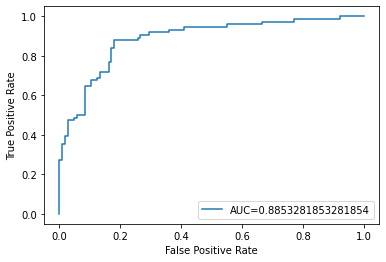

In [86]:
#define metrics
y_pred_proba = lgisticreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### SVM

In [87]:
from sklearn import svm
svm = svm.SVC(probability= True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print("score:  ", svm.score(x_test, y_test))
confusion_matrix(y_test, y_pred)

score:   0.5977653631284916


array([[103,   2],
       [ 70,   4]], dtype=int64)

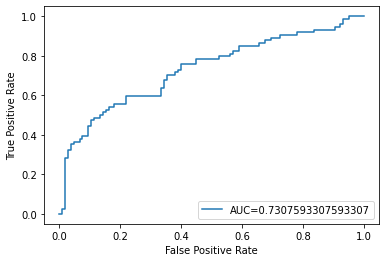

In [88]:
#define metrics
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### decision tree

In [89]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred= tree.predict(x_test)
print("score:  ", tree.score(x_test, y_test))
confusion_matrix(y_test, y_pred)


score:   0.7486033519553073


array([[86, 19],
       [26, 48]], dtype=int64)

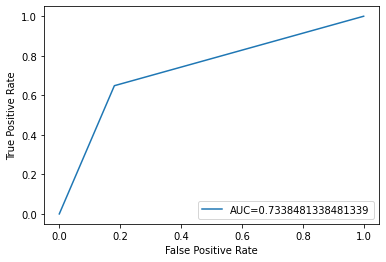

In [90]:
#define metrics
y_pred_proba = tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
y_pred= forest.predict(x_test)
print("score:  ", forest.score(x_test, y_test))
confusion_matrix(y_test, y_pred)

score:   0.8379888268156425


array([[91, 14],
       [15, 59]], dtype=int64)

fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

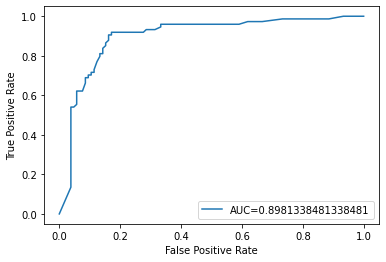

In [92]:
#define metrics
y_pred_proba = forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()